In [ ]:
import pandas as pd
import numpy as np
# THis model used 2000 dataset
# Load the file
file_path = r"F:\programming\machine learning\2000 data.txt"

# Read lines that contain table data
with open(file_path, 'r', encoding='utf-8') as file:
    lines = [line.strip() for line in file if line.strip().startswith('|')]

# Parse table content
rows = [line.split('|')[1:-1] for line in lines]  # remove outer borders
rows = [[cell.strip() for cell in row] for row in rows]

# Extract header and data
header = rows[0]
data = rows[1:]

# Create DataFrame and drop the first column ("Circuit Number")
df = pd.DataFrame(data, columns=header)
data = df.iloc[:, 1:]

# Convert numeric features to float
for col in data.columns[:-1]:  # all except simulator name
    data[col] = pd.to_numeric(data[col], errors='coerce')

# Drop any rows with invalid data
data.dropna(inplace=True)

# Extract features and labels
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Filter top 10 simulators (at least 2 samples)
sim_counts = y.value_counts()
top_10_simulators = sim_counts[sim_counts >= 2].head(10).index

# Apply mask
mask = y.isin(top_10_simulators)
X = X[mask].reset_index(drop=True)
y = y[mask].reset_index(drop=True)

# Final check
print(" Top 10 simulators selected:", list(top_10_simulators))

 Top 10 simulators selected: ['ibmq_sherbrooke', 'ibmq_prague', 'ibmq_quebec', 'ibmq_marrakesh', 'ibmq_sydney', 'ibmq_peekskill', 'ibmq_singapore', 'ibmq_manhattan', 'ibmq_washington', 'ibmq_poughkeepsie']


C:\Users\Sajjad\AppData\Local\Temp\ipykernel_3116\1762748651.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.to_numeric(data[col], errors='coerce')
C:\Users\Sajjad\AppData\Local\Temp\ipykernel_3116\1762748651.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.dropna(inplace=True)


In [212]:
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Convert simulator names to numbers
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Show mapping
print("Class mapping:")
for cls, code in zip(le.classes_, le.transform(le.classes_)):
    print(f"{cls} → {code}")
y=y_encoded


Class mapping:
ibmq_manhattan → 0
ibmq_marrakesh → 1
ibmq_peekskill → 2
ibmq_poughkeepsie → 3
ibmq_prague → 4
ibmq_quebec → 5
ibmq_sherbrooke → 6
ibmq_singapore → 7
ibmq_sydney → 8
ibmq_washington → 9


In [213]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Choose number of components (e.g., 10, or use 95% explained variance)
pca = PCA(n_components=15)  # keep 95% of variance
X = pca.fit_transform(X)

print(f"Reduced dimensions: {X.shape[1]}")


# Label encode the original string labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Split the encoded labels
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

# Convert to one-hot encoding
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# Create the scaler
scaler3 = StandardScaler()
X_train = scaler3.fit_transform(X_train)
scaler3 = StandardScaler()
X_test = scaler3.fit_transform(X_test)


Reduced dimensions: 15


In [214]:
X_train.shape

(1104, 15)

In [215]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(20, activation='relu'))
model.add(Dense(15, activation='relu'))
model.add(Dense(10, activation='softmax'))  # Final output layer


c:\Users\Sajjad\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [216]:
model.summary()

Model: "sequential_16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_61 (Dense)                │ (None, 10)             │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_62 (Dense)                │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_63 (Dense)                │ (None, 15)             │           315 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_64 (Dense)                │ (None, 10)             │           160 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 855 (3.34 KB)

 Trainable params: 855 (3.34 KB)

 Non-trainable params: 0 (0.00 B)

In [217]:
model.predict(X_test[:3])

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step


array([[0.0737307 , 0.09999443, 0.13432574, 0.07757931, 0.0830946 ,
        0.11698963, 0.08741206, 0.1669646 , 0.08313264, 0.07677624],
       [0.05363519, 0.08755327, 0.11865677, 0.09833468, 0.11450105,
        0.10272186, 0.08068365, 0.20801629, 0.08702508, 0.04887215],
       [0.07993446, 0.06018646, 0.09918326, 0.16639109, 0.14956382,
        0.04419766, 0.07673883, 0.17143026, 0.09141677, 0.06095733]],
      dtype=float32)

In [218]:
import tensorflow.keras as ks
early_stopping = ks.callbacks.EarlyStopping(
    monitor='val_loss',      # what to monitor: 'val_loss' 
    patience=10,              # number of epochs with no improvement before stopping
    restore_best_weights=True # revert to the best model weights
)
model.compile(
    loss=ks.losses.categorical_crossentropy,  # for one-hot labels
    optimizer = ks.optimizers.Adam(),
    metrics=['accuracy']  # measures multi-class classification accuracy
)


In [219]:
history = model.fit(
    X_train, y_train_cat,
    epochs=150,
    batch_size=1024  ,
    validation_data=(X_test, y_test_cat),
    callbacks=[early_stopping]
)

Epoch 1/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 227ms/step - accuracy: 0.0792 - loss: 2.3436 - val_accuracy: 0.0903 - val_loss: 2.3187
Epoch 2/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step - accuracy: 0.0872 - loss: 2.3369 - val_accuracy: 0.0975 - val_loss: 2.3143
Epoch 3/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step - accuracy: 0.0934 - loss: 2.3294 - val_accuracy: 0.1011 - val_loss: 2.3101
Epoch 4/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step - accuracy: 0.0962 - loss: 2.3244 - val_accuracy: 0.0975 - val_loss: 2.3063
Epoch 5/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step - accuracy: 0.0993 - loss: 2.3198 - val_accuracy: 0.1011 - val_loss: 2.3030
Epoch 6/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step - accuracy: 0.1055 - loss: 2.3144 - val_accuracy: 0.1155 - val_loss: 2.2999
Epoch 7/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step - accuracy: 0.1086 - loss: 2.3104 - val_accuracy: 0.1155 - val_loss: 2.2970
Epoch 8/150
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step - accuracy: 0.1166 - loss: 2.3059 - val_accuracy: 0.1119 - val_loss

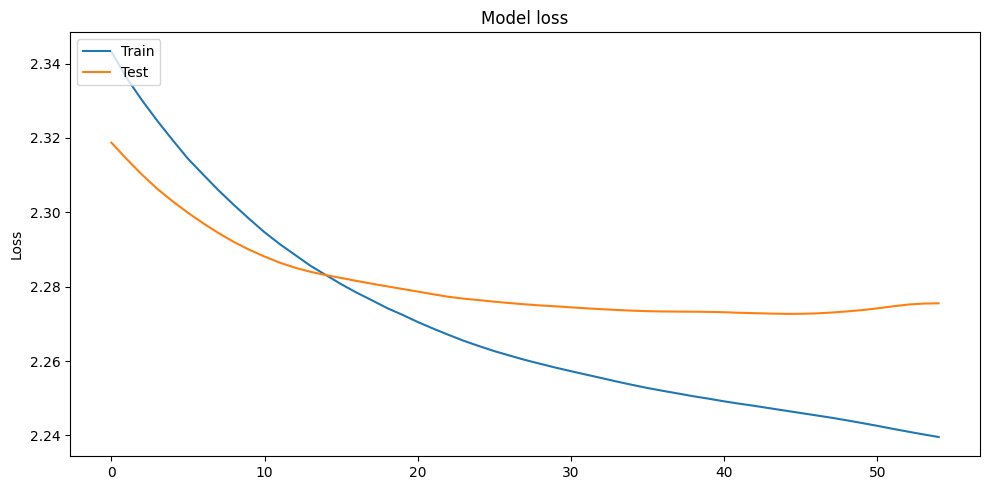

In [220]:
# Plot training & validation accuracy values
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(10,5))

# Plot training & validation loss values
ax = fig.add_subplot(1,1,1, title = 'Model loss', ylabel= 'Loss')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

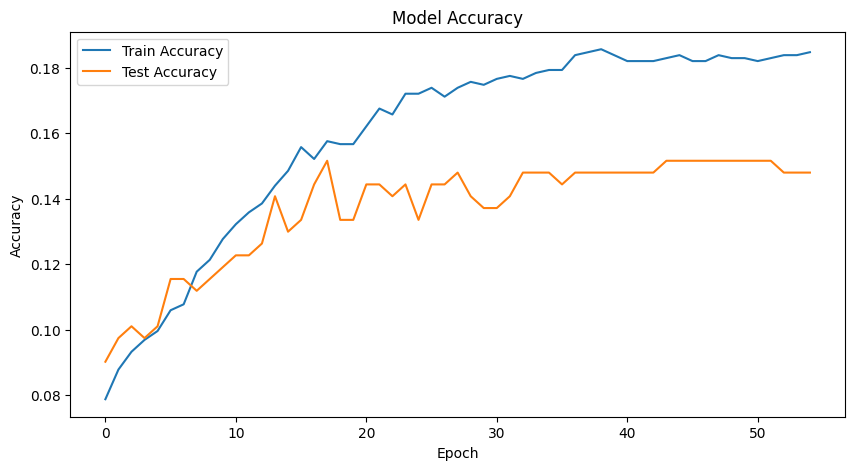

In [221]:
import matplotlib.pyplot as plt

# Plot accuracy
plt.figure(figsize=(10, 5))
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Test Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [222]:
#Model accuracy
loss, accuracy = model.evaluate(X_test, y_test_cat, verbose=0)
print(loss)
print(accuracy)


2.2726919651031494
0.15162454545497894


9/9 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step 


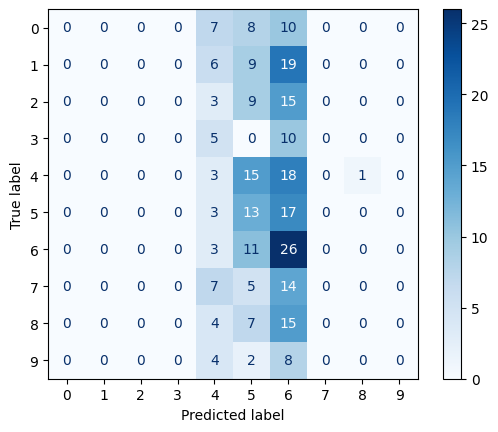

In [223]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np

y_pred_probs = model.predict(X_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true = np.argmax(y_test_cat, axis=1)

cm = confusion_matrix(y_true, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap='Blues')
plt.show()
